In [211]:
# Importing necessary libraries for data analysis, visualization, and association rule mining
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations and array handling
import plotly.express as px  # For data visualization with a simpler syntax
import plotly.graph_objects as go  # For more customizable and advanced visualizations
import networkx as nx  # For creating and visualizing graphs and networks
from mlxtend.preprocessing import TransactionEncoder  # For converting transaction data into a format suitable for association rule mining
from mlxtend.frequent_patterns import apriori, association_rules  # For generating frequent itemsets and association rules
import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations in Python
import warnings  # To handle warnings in the code

# Suppress warnings to keep output clean and focused on results
warnings.filterwarnings('ignore')

# Set the default plotting style for matplotlib
plt.style.use('default')

In [213]:
# Import the dataset from a CSV file
data = pd.read_csv(r"C:\Users\Zahid.Shaikh\100days\64\Market_Basket_Optimisation.csv", header=None)

# Get the shape of the dataset (rows, columns)
rows, columns = data.shape

# Print the number of rows and columns separately
print("Number of rows:", rows)
print("Number of columns:", columns)

# Display the contents of the dataset to verify the data load
data


Number of rows: 7501
Number of columns: 20


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [215]:
# Generate summary statistics of the dataset
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [216]:
#Checking Null values
data.isna().sum()

0        0
1     1754
2     3112
3     4156
4     4972
5     5637
6     6132
7     6520
8     6847
9     7106
10    7245
11    7347
12    7414
13    7454
14    7476
15    7493
16    7497
17    7497
18    7498
19    7500
dtype: int64

In [218]:
# The most demanded items in dataset / Top 10

# 1. Gather All Items of Each Transaction into a Numpy Array
# Loop through each row (transaction) in the dataset
transaction = []
for i in range(0, data.shape[0]):  # Iterate over rows
    for j in range(0, data.shape[1]):  # Iterate over columns (items in each transaction)
        transaction.append(data.values[i, j])  # Append each item in the transaction to the list

# Convert the transaction list to a numpy array for easier manipulation
transaction = np.array(transaction)

# 2. Transform the Numpy Array into a Pandas DataFrame
# Create a DataFrame with a single column "items" for each item in the transactions
df = pd.DataFrame(transaction, columns=["items"]) 
df["incident_count"] = 1  # Add a count column with 1 for each item to prepare for grouping

# 3. Remove NaN Items from the Dataset
# Identify rows where the item is NaN and drop these rows from the DataFrame
indexNames = df[df['items'] == "nan"].index
df.drop(indexNames, inplace=True)

# 4. Final Step: Group by Item and Count Occurrences
# Group by item name, sum the incident_count, and sort in descending order to get the most demanded items
df_table = df.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()

# 5. Initial Visualizations of Top 10 Most Demanded Items
# Display the top 10 items with a gradient background for easier visualization
df_table.head(10).style.background_gradient(cmap='Blues')


,items,incident_count
0,mineral water,1788
1,eggs,1348
2,spaghetti,1306
3,french fries,1282
4,chocolate,1230
5,green tea,991
6,milk,972
7,ground beef,737
8,frozen vegetables,715
9,pancakes,713


In [220]:
# The least demanded items in dataset / Bottom 10

# Group by Item and Count Occurrences
# Group by item name, sum the incident_count, and sort in descending order to get the most demanded items
df_table = df.groupby("items").sum().sort_values("incident_count", ascending=True).reset_index()

# Initial Visualizations of Top 10 Least Demanded Items
# Display the top 10 items with a gradient background for easier visualization
df_table.head(10).style.background_gradient(cmap='Greens')

,items,incident_count
0,asparagus,1
1,water spray,3
2,napkins,5
3,cream,7
4,bramble,14
5,tea,29
6,mashed potato,31
7,chutney,31
8,chocolate bread,32
9,dessert wine,33


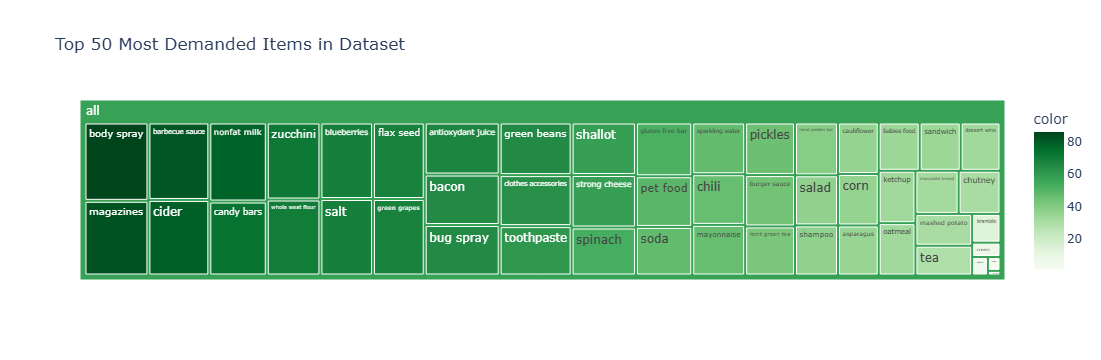

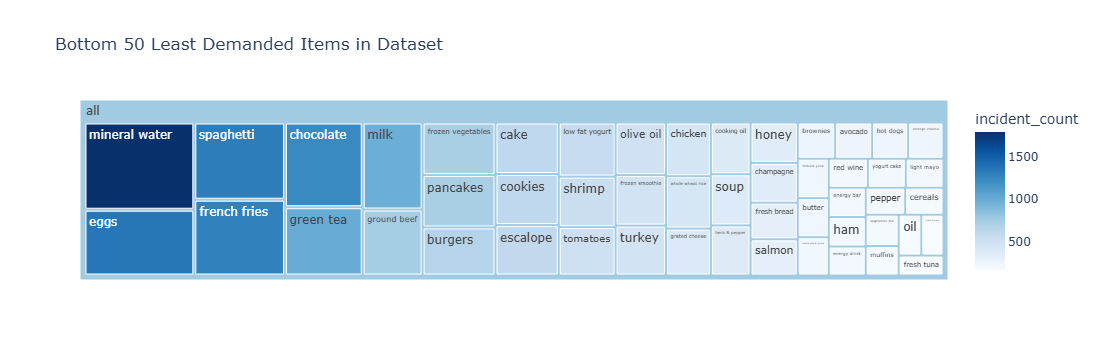

In [221]:
# The most demanded items in dataset / Top 50
df_table["all"] = "all"  # Add a constant column to set the origin for the treemap

# Treemap Visualization for the Top 50 Most Demanded Items
fig = px.treemap(df_table.head(50), path=['all', "items"], values='incident_count',
                 color=df_table["incident_count"].head(50), hover_data=['items'],
                 color_continuous_scale='Greens',
                 title="Top 50 Most Demanded Items in Dataset")
fig.show()

# The least demanded items in dataset / Bottom 50
# Reverse sort the DataFrame to get the items with the lowest incident counts
df_table_least = df_table.tail(50)  # Get the bottom 50 least frequently purchased items

# Treemap Visualization for the Least 50 Demanded Items
fig_least = px.treemap(df_table_least, path=['all', "items"], values='incident_count',
                       color=df_table_least["incident_count"], hover_data=['items'],
                       color_continuous_scale='Blues',
                       title="Bottom 50 Least Demanded Items in Dataset")  # Add title
fig_least.show()


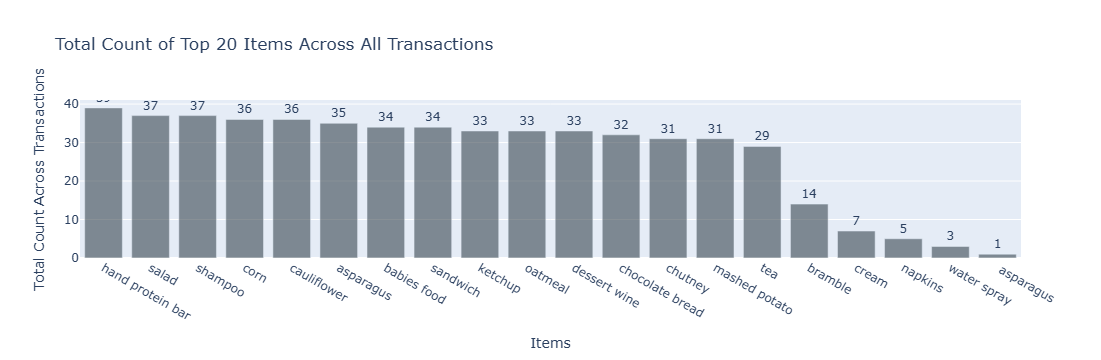

In [222]:
# Check if items have multiple records in a transaction
# - If "Yes", they may mislead the apriori algorithm, so they need handling.

# 1. Transform each transaction into a separate list & store them in a numpy array
# - This helps us iterate through each transaction as an array of items
transaction = []
for i in range(data.shape[0]):
    # Append each row in 'data' as a list of items, converted to strings
    transaction.append([str(data.values[i, j]) for j in range(data.shape[1])])

transaction = np.array(transaction)  # Convert the list of transactions to a numpy array

# 2. Create a DataFrame to check the multiple-record status of top 20 items
# - Retrieve the top 20 items based on frequency from `df_table`
top20 = df_table["items"].head(20).values  # Get top 20 items by frequency
df_top20_multiple_record_check = pd.DataFrame(columns=top20)  # DataFrame to store count of items per transaction

# Count the number of occurrences of each top 20 item in every transaction
for i in range(len(top20)):  # Loop over each of the top 20 items
    array = []  # Temporary list to store counts of the current item in each transaction
    for j in range(transaction.shape[0]):  # Loop over each transaction
        # Count occurrences of the current item in the transaction and add to array
        array.append(np.count_nonzero(transaction[j] == top20[i]))
    
    # Update DataFrame column for the item if all transactions have been counted
    df_top20_multiple_record_check[top20[i]] = array if len(array) == len(data) else array

# Display the first 10 rows to inspect the count of each item in transactions
df_top20_multiple_record_check.head(10)

# 3. Create Plotly visuals for multiple record occurrence

# Bar plot for total count of each item across all transactions
# Sum up the occurrences of each item across all transactions for better insight
item_totals = df_top20_multiple_record_check.sum().sort_values(ascending=False)

bar_fig = px.bar(
    x=item_totals.index,
    y=item_totals.values,
    labels={'x': 'Items', 'y': 'Total Count Across Transactions'},
    title="Total Count of Top 20 Items Across All Transactions",
    text=item_totals.values
)
bar_fig.update_traces(marker_color='rgba(58, 71, 80, 0.6)', textposition='outside')
bar_fig.update_layout(xaxis_title="Items", yaxis_title="Total Count Across Transactions")
bar_fig.show()


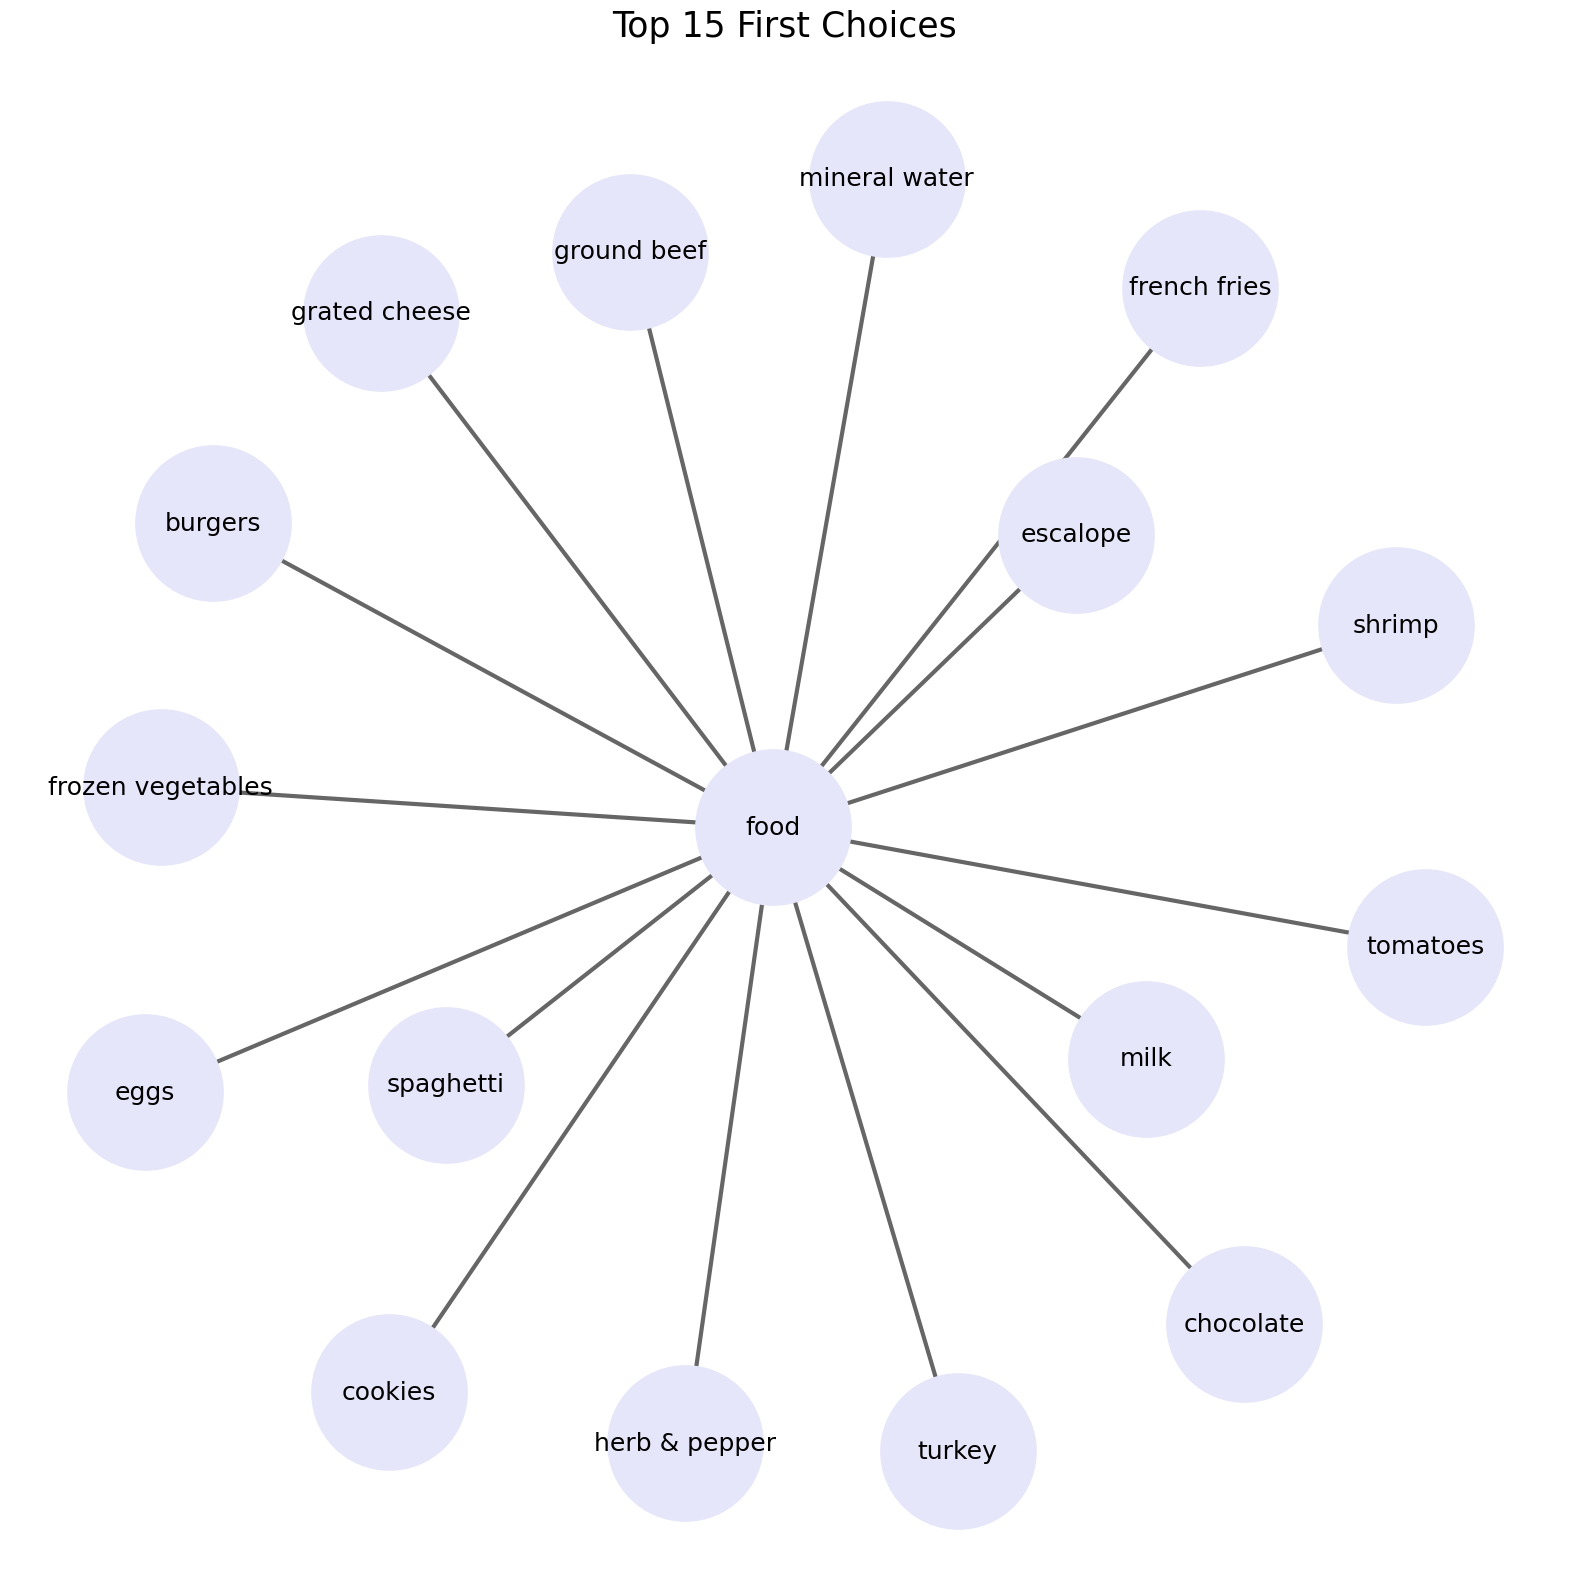

In [223]:
# Choice Analysis / Customers' First Choices

# 1. Gather Only First Choice of Each Transaction into a Numpy Array
# Similar pattern to above, only change is the column number "0" in the append function
transaction = []
for i in range(0, data.shape[0]):  # Iterate through each row of the dataset
    transaction.append(data.values[i, 0])  # Append the first choice (column 0) of each transaction

transaction = np.array(transaction)  # Convert the list of transactions to a numpy array

# 2. Transform Them into a Pandas DataFrame
df_first = pd.DataFrame(transaction, columns=["items"])  # Create DataFrame with first choices
df_first["incident_count"] = 1  # Initialize a count column to 1 for each item

# 3. Delete NaN Items from Dataset
indexNames = df_first[df_first['items'] == "nan"].index  # Identify rows with NaN values
df_first.drop(indexNames, inplace=True)  # Remove NaN entries from the DataFrame

# 4. Final Step: Make a New Appropriate Pandas DataFrame for Visualizations  
# - Group by items, sum the counts, sort values, and reset index
df_table_first = df_first.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()
df_table_first["food"] = "food"  # Add a column for visualization purposes
df_table_first = df_table_first.truncate(before=-1, after=15)  # Keep only the top 15 choices

# Visualize the top 15 first choices using a network graph
plt.rcParams['figure.figsize'] = (20, 20)  # Set the figure size for the plot
first_choice = nx.from_pandas_edgelist(df_table_first, source='food', target="items", edge_attr=True)  # Create a graph from the DataFrame
pos = nx.spring_layout(first_choice)  # Define the layout for the network graph
nx.draw_networkx_nodes(first_choice, pos, node_size=12500, node_color="lavender")  # Draw nodes with specified size and color
nx.draw_networkx_edges(first_choice, pos, width=3, alpha=0.6, edge_color='black')  # Draw edges with specified width and transparency
nx.draw_networkx_labels(first_choice, pos, font_size=18, font_family='sans-serif')  # Label nodes with specified font size and family
plt.axis('off')  # Turn off the axis
plt.grid()  # Display a grid
plt.title('Top 15 First Choices', fontsize=25)  # Set the title for the plot
plt.show()  # Display the plot


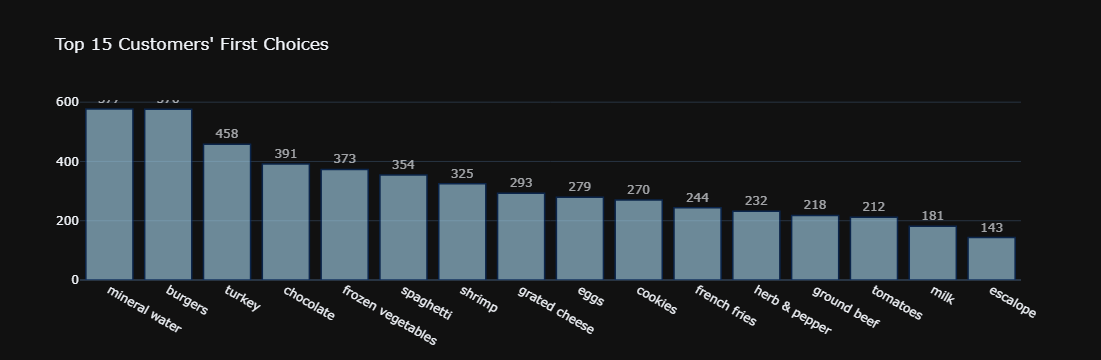

In [224]:
# Visualize the Data
# - Create a bar chart to show the top 15 first choices
fig = go.Figure(data=[go.Bar(
    x=df_table_first["items"],  # X-axis: item names
    y=df_table_first["incident_count"],  # Y-axis: incident counts
    hovertext=df_table_first["items"],  # Hover text to display item names
    text=df_table_first["incident_count"],  # Display counts on bars
    textposition="outside"  # Position text outside the bars
)])

# Update the appearance of the bar chart
fig.update_traces(
    marker_color='rgb(158,202,225)',  # Set bar color
    marker_line_color='rgb(8,48,107)',  # Set border color
    marker_line_width=1.5,  # Set border width
    opacity=0.65  # Set transparency
)

# Update the layout of the figure
fig.update_layout(
    title_text="Top 15 Customers' First Choices",  # Set the title of the chart
    template="plotly_dark"  # Use a dark template for styling
)

# Display the bar chart
fig.show()  # Show the plot

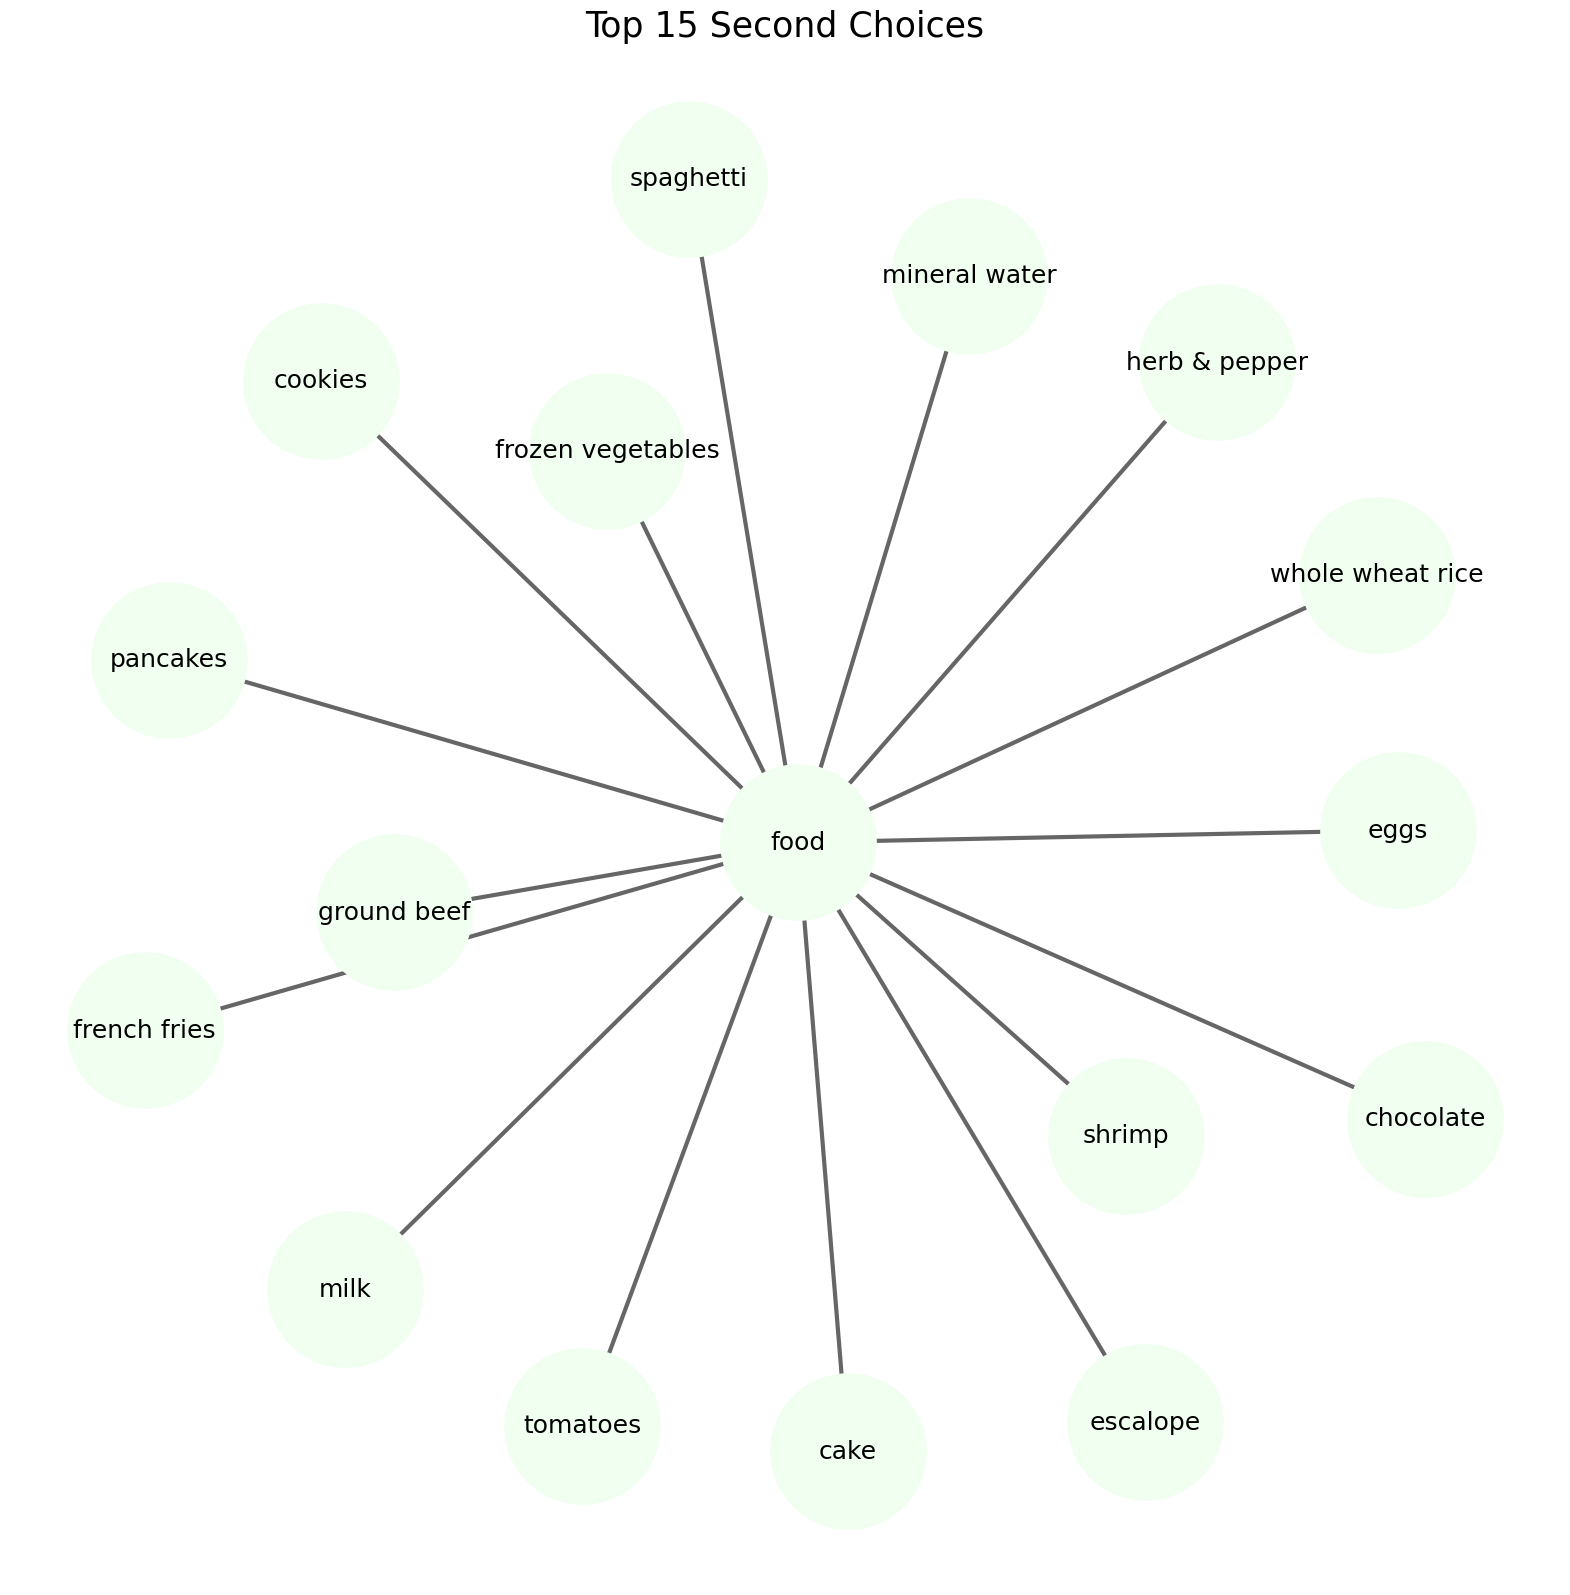

In [228]:
# Choice Analysis / Customers' Second Choices

# 1. Gather Only Second Choice of Each Transaction into Numpy Array
# - Assuming the second choice is in column "1" of the dataset.
transaction = []  # Initialize an empty list to store second choices
for i in range(0, data.shape[0]):  # Iterate over all rows in the dataset
    transaction.append(data.values[i, 1])  # Append the second choice from each transaction

transaction = np.array(transaction)  # Convert the list of second choices to a numpy array

# 2. Transform Them into a Pandas DataFrame
df_second = pd.DataFrame(transaction, columns=["items"])  # Create a DataFrame with a single column for items
df_second["incident_count"] = 1  # Initialize a count of 1 for each item for future grouping

# 3. Delete NaN Items from Dataset
# - Remove any rows where the 'items' column contains "nan"
indexNames = df_second[df_second['items'] == "nan"].index  # Identify index of NaN items
df_second.drop(indexNames, inplace=True)  # Drop NaN items from the DataFrame

# 4. Final Step: Make a New DataFrame for Visualizations  
# - Group by item and sum the counts, then sort by incident count in descending order
df_table_second = (
    df_second.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()
)
df_table_second["food"] = "food"  # Add a column to maintain a category for visualization
df_table_second = df_table_second.truncate(before=-1, after=15)  # Select the top 15 items by incident count

# Create a Network Graph to Visualize the Second Choices
second_choice = nx.from_pandas_edgelist(df_table_second, source='food', target="items", edge_attr=True)  # Create a network graph from the DataFrame
pos = nx.spring_layout(second_choice)  # Define the layout for the nodes in the graph

# Draw the nodes, edges, and labels for the network graph
nx.draw_networkx_nodes(second_choice, pos, node_size=12500, node_color="honeydew")  # Draw nodes with specific size and color
nx.draw_networkx_edges(second_choice, pos, width=3, alpha=0.6, edge_color='black')  # Draw edges with specified width and transparency
nx.draw_networkx_labels(second_choice, pos, font_size=18, font_family='sans-serif')  # Draw labels with specified font size and family

# Set visualization parameters
plt.rcParams['figure.figsize'] = (20, 20)  # Set the figure size for the plot
plt.axis('off')  # Turn off the axis
plt.grid()  # Show the grid
plt.title('Top 15 Second Choices', fontsize=25)  # Set the title of the graph
plt.show()  # Display the plot

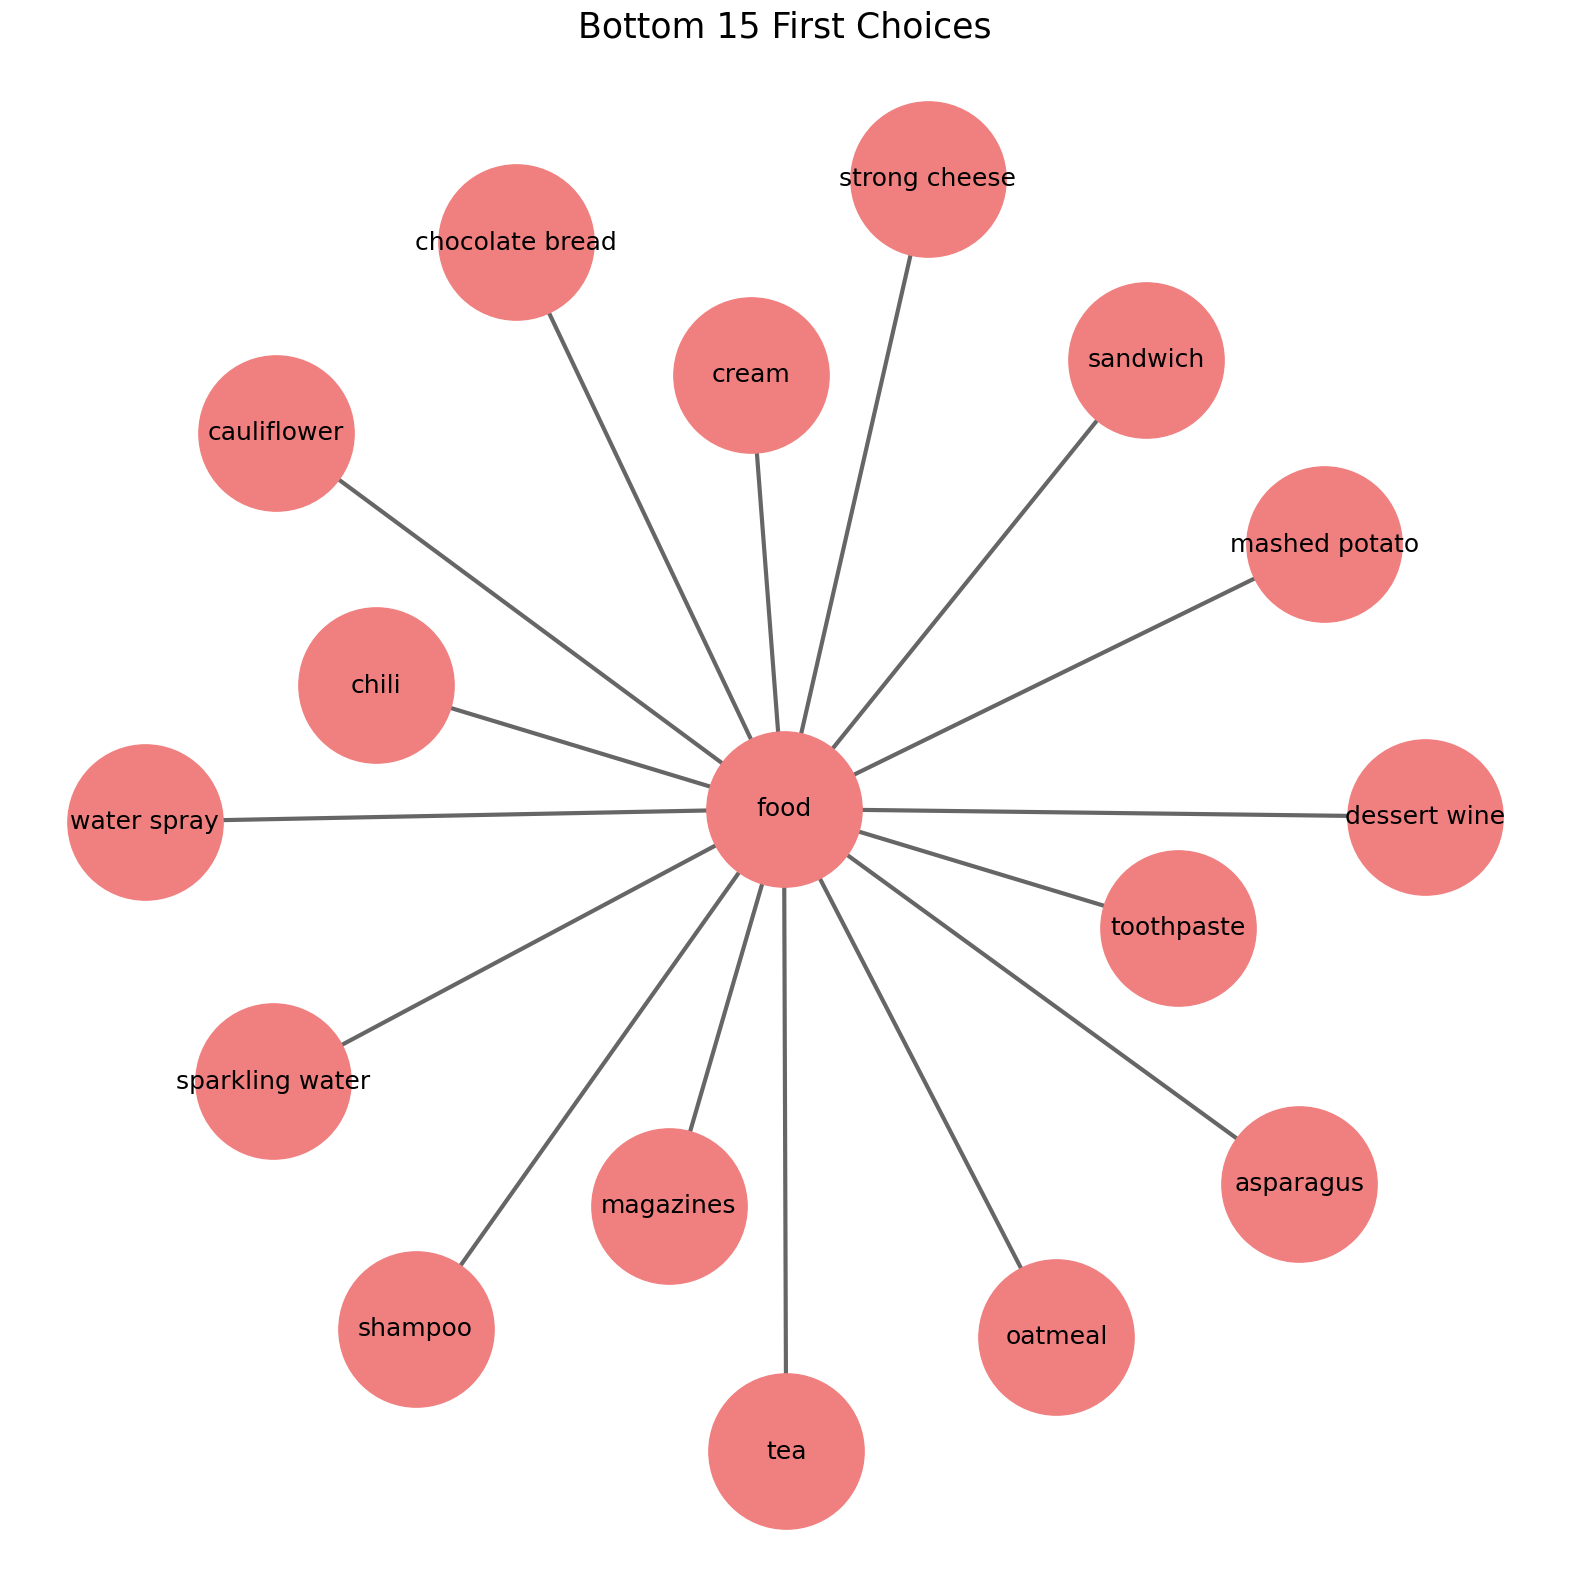

In [233]:
# Choice Analysis / Customers' Bottom 15 Choices

# 1. Gather Only Second Choice of Each Transaction into Numpy Array
# - Assuming the second choice is in column "1" of the dataset.
transaction = []  # Initialize an empty list to store second choices
for i in range(0, data.shape[0]):  # Iterate over all rows in the dataset
    transaction.append(data.values[i, 1])  # Append the second choice from each transaction

transaction = np.array(transaction)  # Convert the list of second choices to a numpy array

# 2. Transform Them into a Pandas DataFrame
df_second = pd.DataFrame(transaction, columns=["items"])  # Create a DataFrame with a single column for items
df_second["incident_count"] = 1  # Initialize a count of 1 for each item for future grouping

# 3. Delete NaN Items from Dataset
# - Remove any rows where the 'items' column contains "nan"
indexNames = df_second[df_second['items'] == "nan"].index  # Identify index of NaN items
df_second.drop(indexNames, inplace=True)  # Drop NaN items from the DataFrame

# 4. Final Step: Make a New DataFrame for Visualizations  
# - Group by item and sum the counts, then sort by incident count in ascending order to get the bottom items
df_table_second = (
    df_second.groupby("items").sum().sort_values("incident_count", ascending=True).reset_index()  # Sort ascending to find bottom choices
)
df_table_second["food"] = "food"  # Add a column to maintain a category for visualization
df_table_second = df_table_second.truncate(before=-1, after=15)  # Select the bottom 15 items by incident count

# Create a Network Graph to Visualize the Bottom Choices
bottom_choice = nx.from_pandas_edgelist(df_table_second, source='food', target="items", edge_attr=True)  # Create a network graph from the DataFrame
pos = nx.spring_layout(bottom_choice)  # Define the layout for the nodes in the graph

# Draw the nodes, edges, and labels for the network graph
nx.draw_networkx_nodes(bottom_choice, pos, node_size=12500, node_color="lightcoral")  # Draw nodes with specific size and color
nx.draw_networkx_edges(bottom_choice, pos, width=3, alpha=0.6, edge_color='black')  # Draw edges with specified width and transparency
nx.draw_networkx_labels(bottom_choice, pos, font_size=18, font_family='sans-serif')  # Draw labels with specified font size and family

# Set visualization parameters
plt.rcParams['figure.figsize'] = (20, 20)  # Set the figure size for the plot
plt.axis('off')  # Turn off the axis
plt.grid()  # Show the grid
plt.title('Bottom 15 First Choices', fontsize=25)  # Set the title of the graph
plt.show()  # Display the plot


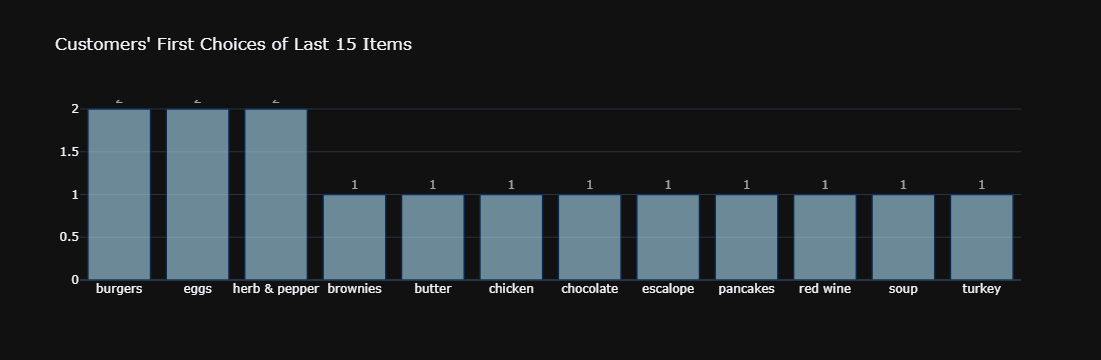

In [235]:
# Choice Analysis / Customers' First Choices of Last 15 Items

# 1. Gather Only First Choice of Each Transaction into Numpy Array
## For Column "0" (assuming first choice is in column 0)
transaction = []
for i in range(data.shape[0] - 15, data.shape[0]):  # Only last 15 items
    transaction.append(data.values[i, 0])

transaction = np.array(transaction)

# 2. Transform Them into a Pandas DataFrame
df_first = pd.DataFrame(transaction, columns=["items"])  # Transaction Item Name
df_first["incident_count"] = 1  # Set count as 1 for each item for grouping later

# 3. Delete NaN Items from Dataset
indexNames = df_first[df_first['items'] == "nan"].index
df_first.drop(indexNames, inplace=True)

# 4. Final Step: Make a New DataFrame for Visualizations  
df_table_first = df_first.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()
df_table_first["food"] = "food"

# Visualize the Data
fig = go.Figure(data=[go.Bar(x=df_table_first["items"], y=df_table_first["incident_count"],
            hovertext=df_table_first["items"], text=df_table_first["incident_count"], textposition="outside")])

fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.65)
fig.update_layout(title_text="Customers' First Choices of Last 15 Items", template="plotly_dark")
fig.show()


In [237]:
# Transform Every Transaction to Separate List & Gather Them into Numpy Array

transaction = []  # Initialize an empty list to hold each transaction as a separate list
for i in range(data.shape[0]):  # Iterate over each row in the dataset (each transaction)
    # Create a list for the current transaction by converting each column value to a string
    transaction.append([str(data.values[i, j]) for j in range(data.shape[1])])  
    
# Convert the list of transactions into a NumPy array for efficient numerical operations
transaction = np.array(transaction)  
transaction  # Display the resulting NumPy array containing all transactions

array([['shrimp', 'almonds', 'avocado', ..., 'frozen smoothie',
        'spinach', 'olive oil'],
       ['burgers', 'meatballs', 'eggs', ..., 'nan', 'nan', 'nan'],
       ['chutney', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ...,
       ['chicken', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ['escalope', 'green tea', 'nan', ..., 'nan', 'nan', 'nan'],
       ['eggs', 'frozen smoothie', 'yogurt cake', ..., 'nan', 'nan',
        'nan']], dtype='<U20')

In [238]:
# Initialize the TransactionEncoder, which is used to convert transactions into a format suitable for analysis
te = TransactionEncoder()

# Fit the encoder to the transaction data and transform it into a one-hot encoded format
# - The fit method learns the unique items from the transactions.
# - The transform method converts the transactions into a binary matrix (one-hot encoding).
te_ary = te.fit(transaction).transform(transaction)

# Create a DataFrame from the one-hot encoded array
# - The columns of the DataFrame are the unique items learned by the encoder.
dataset = pd.DataFrame(te_ary, columns=te.columns_)  # Construct DataFrame with one-hot encoded data

# Display the resulting dataset
dataset  # This DataFrame shows the presence (1) or absence (0) of items in each transaction

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [241]:
# Select the top 50 items from the DataFrame 'df_table'
first50 = df_table["items"].values  # Store the top 50 items in a variable

# Extract only the columns from 'dataset' that correspond to the top 50 items
dataset = dataset.loc[:, first50]  # Update 'dataset' to include only the top 50 items

# Display the resulting filtered dataset
dataset  # This DataFrame now contains only the columns for the top 50 items


,asparagus,water spray,napkins,cream,bramble,tea,mashed potato,chutney,chocolate bread,dessert wine,...,pancakes,frozen vegetables,ground beef,milk,green tea,chocolate,french fries,spaghetti,eggs,mineral water
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,True,False,True,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [243]:
# We extracted first 50 column successfully.
dataset.columns

Index([' asparagus', 'water spray', 'napkins', 'cream', 'bramble', 'tea',
       'mashed potato', 'chutney', 'chocolate bread', 'dessert wine',
       ...
       'pancakes', 'frozen vegetables', 'ground beef', 'milk', 'green tea',
       'chocolate', 'french fries', 'spaghetti', 'eggs', 'mineral water'],
      dtype='object', length=120)

In [245]:
# Convert the dataset into 1-0 (binary) encoding
# This encoding transforms boolean values into numeric values: 
# False becomes 0 and True becomes 1.

def encode_units(x):
    # Check if the value is False
    if x == False:
        return 0  # Return 0 for False
    # Check if the value is True
    if x == True:
        return 1  # Return 1 for True

# Apply the 'encode_units' function to each element in the dataset
# 'applymap' applies the function element-wise across the entire DataFrame.
dataset = dataset.applymap(encode_units)

# Display the first 10 rows of the encoded dataset
dataset.head(10)  # Show the top 10 rows to verify the encoding results

,asparagus,water spray,napkins,cream,bramble,tea,mashed potato,chutney,chocolate bread,dessert wine,...,pancakes,frozen vegetables,ground beef,milk,green tea,chocolate,french fries,spaghetti,eggs,mineral water
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [247]:
# Extracting the most frequent itemsets using the apriori algorithm from the Mlxtend library.
# This method identifies itemsets that occur frequently in the dataset, based on a minimum support threshold.

# Apply the apriori algorithm to the dataset
# - 'min_support=0.01' specifies the minimum support threshold (1% of transactions) for an itemset to be considered frequent.
# - 'use_colnames=True' ensures that the itemset names are displayed in the output instead of their corresponding indices.
frequent_itemsets = apriori(dataset, min_support=0.01, use_colnames=True)

# Add a new column 'length' to the frequent_itemsets DataFrame
# This column contains the length of each itemset, making it easier to filter itemsets based on their size.
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# Display the DataFrame containing the frequent itemsets along with their support and length
frequent_itemsets  # Show the results of the frequent itemsets extraction


,support,itemsets,length
0,0.010399,(nonfat milk),1
1,0.010532,(cider),1
2,0.010799,(barbecue sauce),1
3,0.010932,(magazines),1
4,0.011465,(body spray),1
...,...,...,...
252,0.010532,"(eggs, spaghetti, chocolate)",3
253,0.015865,"(mineral water, spaghetti, chocolate)",3
254,0.013465,"(mineral water, eggs, chocolate)",3
255,0.010132,"(mineral water, french fries, spaghetti)",3


In [249]:
# Filter the frequent_itemsets DataFrame to find itemsets of length 2
# that have a support value greater than or equal to 0.05 (5%).
filtered_itemsets = frequent_itemsets[
    (frequent_itemsets['length'] == 2) &  # Condition to select itemsets with exactly 2 items
    (frequent_itemsets['support'] >= 0.05)  # Condition to select itemsets with support >= 5%
]

# Display the filtered itemsets that meet the criteria
filtered_itemsets


,support,itemsets,length
233,0.052660,"(mineral water, chocolate)",2
238,0.059725,"(mineral water, spaghetti)",2
239,0.050927,"(mineral water, eggs)",2


In [251]:
# Filter the DataFrame to extract itemsets of a specific length
# Here, we are selecting itemsets that have exactly 3 items.
# The resulting DataFrame will only contain those frequent itemsets.

three_itemsets = frequent_itemsets[frequent_itemsets['length'] == 3]  # Filter for itemsets with length 3

# Display the first few rows of the filtered DataFrame
three_itemsets.head()  # Show the top entries of the DataFrame containing 3-item sets


,support,itemsets,length
240,0.010265,"(olive oil, mineral water, spaghetti)",3
241,0.011465,"(mineral water, pancakes, spaghetti)",3
242,0.011065,"(frozen vegetables, mineral water, milk)",3
243,0.011998,"(frozen vegetables, mineral water, spaghetti)",3
244,0.011065,"(mineral water, milk, ground beef)",3


In [253]:
# Generate association rules from the frequent itemsets.
# Define a metric to evaluate the strength of the rules and set a minimum threshold for that metric.

# 1. Metric: "Lift" - used to evaluate dependency between antecedents and consequents.
#    - Lift > 1 indicates a positive dependency between antecedents and consequents.
#    - Here, we set a threshold of 1.2 to capture only those rules with strong positive dependency.
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

# 2. Add columns to store the length of antecedents and consequents in each rule.
#    - "antecedents_length": Number of items in the antecedent set.
#    - "consequents_length": Number of items in the consequent set.
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))

# 3. Sort the rules DataFrame by the "lift" metric in descending order for easy access to the strongest rules.
rules.sort_values("lift", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_length,consequents_length
22,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860,0.732460,1,1
23,(ground beef),(herb & pepper),0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.135410,0.772094,1,1
284,"(mineral water, spaghetti)",(ground beef),0.059725,0.098254,0.017064,0.285714,2.907928,0.011196,1.262445,0.697788,2,1
289,(ground beef),"(mineral water, spaghetti)",0.098254,0.059725,0.017064,0.173677,2.907928,0.011196,1.137902,0.727602,1,2
250,"(mineral water, spaghetti)",(olive oil),0.059725,0.065858,0.010265,0.171875,2.609786,0.006332,1.128021,0.656007,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
151,(eggs),(low fat yogurt),0.179709,0.076523,0.016798,0.093472,1.221484,0.003046,1.018696,0.221048,1,1
138,(shrimp),(green tea),0.071457,0.132116,0.011465,0.160448,1.214449,0.002025,1.033747,0.190170,1,1
139,(green tea),(shrimp),0.132116,0.071457,0.011465,0.086781,1.214449,0.002025,1.016780,0.203462,1,1
157,(french fries),(escalope),0.170911,0.079323,0.016398,0.095944,1.209537,0.002841,1.018385,0.208949,1,1


In [255]:
# Observing Insights on Dependency and Confidence Levels

# Based on the generated rules table, we can interpret the dependency strength between item pairs.
# Example: The lift score between (herb & pepper) and (ground beef) indicates a high dependency,
#          as the lift is approximately 2.5 times the threshold (1.2).
#          The confidence score of 32% is also substantial, suggesting frequent co-occurrence.

# To gain more insights:
#   Sort the rules by confidence in descending order to prioritize pairs with the highest confidence levels.
#   This will highlight item pairs with a strong likelihood of appearing together in transactions.

rules.sort_values("confidence", ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_length,consequents_length
292,"(eggs, ground beef)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848,0.540342,2,1
274,"(milk, ground beef)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552,0.537969,2,1
280,"(ground beef, chocolate)",(mineral water),0.023064,0.238368,0.010932,0.473988,1.988472,0.005434,1.447937,0.508837,2,1
261,"(frozen vegetables, milk)",(mineral water),0.023597,0.238368,0.011065,0.468927,1.967236,0.005440,1.434136,0.503555,2,1
37,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
281,(mineral water),"(ground beef, chocolate)",0.238368,0.023064,0.010932,0.045861,1.988472,0.005434,1.023893,0.652679,1,2
252,(mineral water),"(olive oil, spaghetti)",0.238368,0.022930,0.010265,0.043065,1.878079,0.004799,1.021041,0.613868,1,2
0,(mineral water),(cereals),0.238368,0.025730,0.010265,0.043065,1.673729,0.004132,1.018115,0.528512,1,1
293,(mineral water),"(eggs, ground beef)",0.238368,0.019997,0.010132,0.042506,2.125563,0.005365,1.023507,0.695266,1,2


In [257]:
# Analyze association rules excluding "mineral water" as an item in both antecedents and consequents.
# - Observation: Customers who bought items like (eggs, ground beef) tend to buy (mineral water) 
#   with a 50% likelihood, supported by high lift and conviction scores, suggesting a strong association.
# - Business Insight: Keeping these items close together in stores could boost sales, leveraging the 
#   likelihood of these purchases occurring together.
# 
# However, since "mineral water" is the most frequently purchased item in this dataset, many association rules 
# involve it, potentially overshadowing other important item relationships. To uncover insights beyond 
# associations with mineral water, we create a filtered view by excluding it from both antecedents and consequents.

# 1. Filter out rules where "mineral water" appears in either the antecedents or consequents.
#    - This step helps to examine item associations without the overwhelming influence of "mineral water".
# 2. Sort the remaining rules by confidence in descending order for easy access to the strongest non-mineral-water associations.
filtered_rules = rules[
    ~rules["consequents"].str.contains("mineral water", regex=False) & 
    ~rules["antecedents"].str.contains("mineral water", regex=False)
].sort_values("confidence", ascending=False).head(10)  # Show top 10 rules by confidence

filtered_rules  # Display the filtered table


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_length,consequents_length
227,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943,1,1
2,(red wine),(spaghetti),0.028130,0.174110,0.010265,0.364929,2.095966,0.005368,1.300468,0.538028,1,1
110,(olive oil),(spaghetti),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048,0.535186,1,1
298,"(milk, chocolate)",(spaghetti),0.032129,0.174110,0.010932,0.340249,1.954217,0.005338,1.251821,0.504495,2,1
190,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818,0.499424,1,1
24,(herb & pepper),(spaghetti),0.049460,0.174110,0.016264,0.328841,1.888695,0.007653,1.230543,0.495018,1,1
22,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860,0.732460,1,1
321,"(eggs, chocolate)",(spaghetti),0.033196,0.174110,0.010532,0.317269,1.822232,0.004752,1.209686,0.466715,2,1
10,(salmon),(spaghetti),0.042528,0.174110,0.013465,0.316614,1.818472,0.006060,1.208527,0.470079,1,1
52,(grated cheese),(spaghetti),0.052393,0.174110,0.016531,0.315522,1.812196,0.007409,1.206597,0.472963,1,1


In [263]:
# Analyzing Relationships for Product Associations - Ground Beef Focus

# 1. Mineral Water Excluded Analysis: Based on the previous table excluding mineral water,
#    there is a noticeable association between:
#       - Ground beef and spaghetti
#       - Red wine and spaghetti
#    These pairs demonstrate significant relationships, as confirmed by high lift and conviction scores.

# 2. Observing Ground Beef Trends:
#    Ground beef appears at the top of both tables (mineral water included and excluded).
#    This suggests that ground beef has strong association potential with other items.
#    To leverage this, we will analyze association rules where:
#       - Ground beef is the sole antecedent (antecedents_length = 1)
#    This analysis will focus on identifying potential pairings to drive additional sales.

# 3. Filter Rules for Ground Beef as Antecedent:
#    - Select rules where "ground beef" is the only item in the antecedent.
#    - Sort these rules by "confidence" in descending order to prioritize associations with higher likelihood.
rules[rules["antecedents"].str.contains("ground beef", regex=False) & rules["antecedents_length"] == 1].sort_values("confidence", ascending=False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_length,consequents_length
229,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369,1,1
227,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943,1,1
225,(ground beef),(chocolate),0.098254,0.163845,0.023064,0.234735,1.432669,0.006965,1.092635,0.334908,1,1
223,(ground beef),(milk),0.098254,0.129583,0.021997,0.223881,1.727704,0.009265,1.121499,0.467090,1,1
289,(ground beef),"(mineral water, spaghetti)",0.098254,0.059725,0.017064,0.173677,2.907928,0.011196,1.137902,0.727602,1,2
211,(ground beef),(frozen vegetables),0.098254,0.095321,0.016931,0.172320,1.807796,0.007565,1.093031,0.495528,1,1
23,(ground beef),(herb & pepper),0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.135410,0.772094,1,1
195,(ground beef),(pancakes),0.098254,0.095054,0.014531,0.147897,1.555925,0.005192,1.062015,0.396226,1,1
105,(ground beef),(olive oil),0.098254,0.065858,0.014131,0.143826,2.183889,0.007661,1.091066,0.601168,1,1
181,(ground beef),(burgers),0.098254,0.087188,0.011998,0.122117,1.400607,0.003432,1.039787,0.317189,1,1


<center><p>Made with ❤️ by Zahid Salim Shaikh</p></center>